In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joblib import load, dump

In [2]:
from functools import reduce

df1 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/Projects/master/San%20Diego%20Police%20Data/Data/ripa_stops_datasd.csv',sep=',')
df2 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/Projects/master/San%20Diego%20Police%20Data/Data/ripa_stop_reason_datasd.csv',sep=',')
df3 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/Projects/master/San%20Diego%20Police%20Data/Data/ripa_race_datasd.csv',sep=',')
df4 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/Projects/master/San%20Diego%20Police%20Data/Data/ripa_stop_result_datasd.csv',sep=',')
df5 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/Projects/master/San%20Diego%20Police%20Data/Data/ripa_actions_taken_datasd.csv',sep=',')

//anaconda3/envs/DSEnv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda3/envs/DSEnv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Merge dataframes
df_merged_1 = pd.merge(df1, df2, how='inner')
df_merged_2 = pd.merge(df3, df4, how='inner')
df_merged_3= pd.merge(df_merged_1, df_merged_2, how='inner')
df = pd.merge(df_merged_3, df5, how='inner')

print(df.shape)
df.head()

(321815, 41)


,stop_id,ori,agency,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,...,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,resultkey,result,code,resulttext,action,consented
0,2443,CA0371100,SD,10,2018-07-01,00:01:37,30,0,1,"Patrol, traffic enforcement, field operations",...,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,Officer witnessed commission of a crime,"staggering, unable to safely walk",White,6,Custodial Arrest without warrant,64005.0,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,None,NaN
1,2444,CA0371100,SD,18,2018-07-01,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",...,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding,White,2,Warning (verbal or written),54395.0,22349(B) VC - EXC 55MPH SPEED:2 LANE RD (I) 54395,None,NaN
2,2447,CA0371100,SD,1,2018-07-01,00:05:43,15,1,10,Other,...,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.,Hispanic/Latino/a,1,No Action,NaN,NaN,Curbside detention,NaN
3,2447,CA0371100,SD,1,2018-07-01,00:05:43,15,1,10,Other,...,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.,Hispanic/Latino/a,1,No Action,NaN,NaN,Curbside detention,NaN
4,2448,CA0371100,SD,3,2018-07-01,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",...,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,UNSAFE DRIVING,White,1,No Action,NaN,NaN,None,NaN


In [4]:
cols = df.columns.tolist()
cols

['stop_id',
 'ori',
 'agency',
 'exp_years',
 'stopdate',
 'stoptime',
 'stopduration',
 'stop_in_response_to_cfs',
 'officer_assignment_key',
 'assignment',
 'intersection',
 'block',
 'land_mark',
 'street',
 'highway_exit',
 'isschool',
 'school_name',
 'cityname',
 'beat',
 'beat_name',
 'pid',
 'isstudent',
 'perceived_limited_english',
 'perceived_age',
 'perceived_gender',
 'gender_nonconforming',
 'gend',
 'gend_nc',
 'perceived_lgbt',
 'reason_for_stop',
 'reason_for_stopcode',
 'reason_for_stop_code_text',
 'reason_for_stop_detail',
 'reason_for_stop_explanation',
 'race',
 'resultkey',
 'result',
 'code',
 'resulttext',
 'action',
 'consented']

In [5]:
# dropping columns for missing values, constant values, etc.
df = df.drop(['agency', 'ori', 'block', 'gend_nc', 
         'highway_exit', 'intersection', 'land_mark',
         'school_name', 'street', 'gender_nonconforming', 
              'pid', 'consented', 'resulttext', 'code',
              'beat', 'resultkey','reason_for_stopcode', 
              'isschool', 'stop_id', 'isstudent','reason_for_stop_code_text',
             'reason_for_stop_explanation','cityname',
             'perceived_gender'], axis=1)
df.shape

(321815, 17)

In [6]:
# Testing to filter for stops that gave a ticket
# gender - 1 is for a male, 2 is for female
mask = (df['result'] == 'Citation for infraction')
print(df[mask].shape)
df[mask].head()

(46469, 17)


,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,beat_name,perceived_limited_english,perceived_age,gend,perceived_lgbt,reason_for_stop,reason_for_stop_detail,race,result,action
25,1,2018-07-01,01:03:00,15,0,1,"Patrol, traffic enforcement, field operations",Pacific Beach 122,0,35,1,No,Traffic Violation,Moving Violation,Middle Eastern or South Asian,Citation for infraction,None
33,2,2018-07-01,01:52:51,12,0,1,"Patrol, traffic enforcement, field operations",La Jolla 124,0,20,1,No,Traffic Violation,Moving Violation,White,Citation for infraction,None
93,1,2018-07-01,05:00:49,20,0,1,"Patrol, traffic enforcement, field operations",Sorrento Valley 931,0,22,2,No,Traffic Violation,Equipment Violation,Asian,Citation for infraction,None
95,10,2018-07-01,05:29:26,15,0,1,"Patrol, traffic enforcement, field operations",Pacific Beach 122,0,21,1,No,Reasonable Suspicion,Officer witnessed commission of a crime,White,Citation for infraction,Curbside detention
109,1,2018-07-01,05:42:21,83,0,1,"Patrol, traffic enforcement, field operations",Golden Hill 517,0,55,1,No,Traffic Violation,"Non-moving Violation, including Registration V...",White,Citation for infraction,Vehicle impounded


In [7]:
test = df[mask]
test.head()

,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,beat_name,perceived_limited_english,perceived_age,gend,perceived_lgbt,reason_for_stop,reason_for_stop_detail,race,result,action
25,1,2018-07-01,01:03:00,15,0,1,"Patrol, traffic enforcement, field operations",Pacific Beach 122,0,35,1,No,Traffic Violation,Moving Violation,Middle Eastern or South Asian,Citation for infraction,None
33,2,2018-07-01,01:52:51,12,0,1,"Patrol, traffic enforcement, field operations",La Jolla 124,0,20,1,No,Traffic Violation,Moving Violation,White,Citation for infraction,None
93,1,2018-07-01,05:00:49,20,0,1,"Patrol, traffic enforcement, field operations",Sorrento Valley 931,0,22,2,No,Traffic Violation,Equipment Violation,Asian,Citation for infraction,None
95,10,2018-07-01,05:29:26,15,0,1,"Patrol, traffic enforcement, field operations",Pacific Beach 122,0,21,1,No,Reasonable Suspicion,Officer witnessed commission of a crime,White,Citation for infraction,Curbside detention
109,1,2018-07-01,05:42:21,83,0,1,"Patrol, traffic enforcement, field operations",Golden Hill 517,0,55,1,No,Traffic Violation,"Non-moving Violation, including Registration V...",White,Citation for infraction,Vehicle impounded


In [8]:
# Narrowing result columns to ticket or non-ticket actions
list = ['No Action','Warning (verbal or written)', 'Citation for infraction']
test = df[df.result.isin(list)]
test.shape

(114768, 17)

In [9]:
# Confirming that only ticketed and non-ticketed stops are included
test.result.value_counts()

Citation for infraction        46469
Warning (verbal or written)    36003
No Action                      32296
Name: result, dtype: int64

In [10]:
# Applying to df
df = df[df.result.isin(list)]
df.shape

(114768, 17)

In [11]:
df.head()

,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,beat_name,perceived_limited_english,perceived_age,gend,perceived_lgbt,reason_for_stop,reason_for_stop_detail,race,result,action
1,18,2018-07-01,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",Mission Beach 121,0,25,1,No,Traffic Violation,Moving Violation,White,Warning (verbal or written),None
2,1,2018-07-01,00:05:43,15,1,10,Other,El Cerrito 822,0,30,1,No,Reasonable Suspicion,Matched suspect description,Hispanic/Latino/a,No Action,Curbside detention
3,1,2018-07-01,00:05:43,15,1,10,Other,El Cerrito 822,0,30,2,No,Reasonable Suspicion,Other Reasonable Suspicion of a crime,Hispanic/Latino/a,No Action,Curbside detention
4,3,2018-07-01,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",Ocean Beach 614,0,23,1,No,Traffic Violation,Moving Violation,White,No Action,None
16,4,2018-07-01,00:33:19,3,0,2,Gang enforcement,Colina Del Sol 826,0,30,1,No,Traffic Violation,"Non-moving Violation, including Registration V...",Black/African American,No Action,None


# Feature Engineering

In [12]:
# Engineering month, year features
df.stopdate = pd.to_datetime(df.stopdate, infer_datetime_format=True)
df['month'] = df.stopdate.dt.month
df['year'] = df.stopdate.dt.year
df['day'] = df.stopdate.dt.day

df = df.drop(columns='stopdate')
df.head()

,exp_years,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,beat_name,perceived_limited_english,perceived_age,gend,perceived_lgbt,reason_for_stop,reason_for_stop_detail,race,result,action,month,year,day
1,18,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",Mission Beach 121,0,25,1,No,Traffic Violation,Moving Violation,White,Warning (verbal or written),None,7,2018,1
2,1,00:05:43,15,1,10,Other,El Cerrito 822,0,30,1,No,Reasonable Suspicion,Matched suspect description,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1
3,1,00:05:43,15,1,10,Other,El Cerrito 822,0,30,2,No,Reasonable Suspicion,Other Reasonable Suspicion of a crime,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1
4,3,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",Ocean Beach 614,0,23,1,No,Traffic Violation,Moving Violation,White,No Action,None,7,2018,1
16,4,00:33:19,3,0,2,Gang enforcement,Colina Del Sol 826,0,30,1,No,Traffic Violation,"Non-moving Violation, including Registration V...",Black/African American,No Action,None,7,2018,1


In [13]:
# Creating ticket column
# df['ticket'] = df['result'] == 'Citation for infraction'
# df['no_ticket'] = df['result'] != 'Citation for infraction'
# df.head()

In [14]:
# Only including clean data rows from stoptime. This removes 28 rows
df = df[df['stoptime'].str.len()<=8]

In [15]:
# Now binning stoptimes by hour of the day. 0-24
df['stop_hour'] = pd.to_datetime(df['stoptime']).dt.hour
df = df.drop(columns='stoptime')
df.stop_hour.head()

1     0
2     0
3     0
4     0
16    0
Name: stop_hour, dtype: int64

In [16]:
df.stop_hour.dtype

dtype('int64')

In [17]:
# Further binning stop_hour into chunks of time. Conventionally, i think more tickets will happen at odd hours
# (Like 2 in the morning or something)
df['morning'] = (df['stop_hour'] < 12) & (df['stop_hour'] >= 6)
df['afternoon'] = (df['stop_hour'] >= 12) & (df['stop_hour'] < 19)
df['night'] = (df['stop_hour'] >= 19) | (df['stop_hour'] < 6) | (df['stop_hour'] == 0)

df.head()

,exp_years,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,beat_name,perceived_limited_english,perceived_age,gend,perceived_lgbt,...,race,result,action,month,year,day,stop_hour,morning,afternoon,night
1,18,10,0,1,"Patrol, traffic enforcement, field operations",Mission Beach 121,0,25,1,No,...,White,Warning (verbal or written),None,7,2018,1,0,False,False,True
2,1,15,1,10,Other,El Cerrito 822,0,30,1,No,...,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1,0,False,False,True
3,1,15,1,10,Other,El Cerrito 822,0,30,2,No,...,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1,0,False,False,True
4,3,5,0,1,"Patrol, traffic enforcement, field operations",Ocean Beach 614,0,23,1,No,...,White,No Action,None,7,2018,1,0,False,False,True
16,4,3,0,2,Gang enforcement,Colina Del Sol 826,0,30,1,No,...,Black/African American,No Action,None,7,2018,1,0,False,False,True


# Create train, val, test dataframes

In [18]:
# get features and target

target = 'result'

features = df.columns.drop('result')

In [19]:
features

Index(['exp_years', 'stopduration', 'stop_in_response_to_cfs',
       'officer_assignment_key', 'assignment', 'beat_name',
       'perceived_limited_english', 'perceived_age', 'gend', 'perceived_lgbt',
       'reason_for_stop', 'reason_for_stop_detail', 'race', 'action', 'month',
       'year', 'day', 'stop_hour', 'morning', 'afternoon', 'night'],
      dtype='object')

In [20]:
df.shape

(114767, 22)

In [21]:
df.isnull().sum()

exp_years                       0
stopduration                    0
stop_in_response_to_cfs         0
officer_assignment_key          0
assignment                      0
beat_name                       0
perceived_limited_english       0
perceived_age                   0
gend                            0
perceived_lgbt                  0
reason_for_stop                 0
reason_for_stop_detail       5501
race                            0
result                          0
action                          0
month                           0
year                            0
day                             0
stop_hour                       0
morning                         0
afternoon                       0
night                           0
dtype: int64

In [22]:
df = df.dropna()
df.isnull().sum()

exp_years                    0
stopduration                 0
stop_in_response_to_cfs      0
officer_assignment_key       0
assignment                   0
beat_name                    0
perceived_limited_english    0
perceived_age                0
gend                         0
perceived_lgbt               0
reason_for_stop              0
reason_for_stop_detail       0
race                         0
result                       0
action                       0
month                        0
year                         0
day                          0
stop_hour                    0
morning                      0
afternoon                    0
night                        0
dtype: int64

In [23]:
train = df
train.shape

(109266, 22)

In [24]:
from sklearn.model_selection import train_test_split

# Split train into train & test, then will split train again into train and val
train, test = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=42)
train.shape, test.shape

((87412, 22), (21854, 22))

In [25]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['result'], random_state=42)
train.shape,val.shape,test.shape

((69929, 22), (17483, 22), (21854, 22))

In [26]:
# The app has a max of 100 MB. so going make a smaller data set for the app to make predictions on.
# The notebook will still make predictions on the full data set, there will just be a separate dataset for the app.
app_train, app_val = train_test_split(train, train_size=50000, test_size=18363, 
                              stratify=train['result'], random_state=42)
train.shape,val.shape,test.shape, app_train.shape, app_val.shape

((69929, 22), (17483, 22), (21854, 22), (50000, 22), (18363, 22))

In [27]:
# Arrange data into X features matrix and y target vector
target = 'result'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

# And for the app data
app_train_X = app_train.drop(columns=target)
app_train_y = app_train[target]
app_val_X = app_val.drop(columns=target)
app_val_y = app_val[target]
# Check shapes
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)
print('app_train_X shape', app_train_X.shape)
print('app_train_y shape', app_train_y.shape)
print('app_val_X shape', app_val_X.shape)
print('app_val_y shape', app_val_y.shape)

X_train shape (69929, 21)
y_train shape (69929,)
X_val shape (17483, 21)
y_val shape (17483,)
X_test shape (21854, 21)
y_test shape (21854,)
app_train_X shape (50000, 21)
app_train_y shape (50000,)
app_val_X shape (18363, 21)
app_val_y shape (18363,)


# Get accuracy score for majority baseline

In [28]:
# Get accuracy score for majority class baseline
y_train.value_counts(normalize=True)

Citation for infraction        0.419869
Warning (verbal or written)    0.324629
No Action                      0.255502
Name: result, dtype: float64

In [29]:
import numpy as np
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()[0]
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred)

0.4198364125150146

# Create Model - Random Forest

In [30]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Instantiate the class
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42, max_depth=20)
)
# Fit on training set, test on val set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

# Now predicting on test
y_pred = pipeline.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

Validation Accuracy 0.7345993250586283
Test Accuracy 0.7411457856685275


In [31]:
y_pred = pipeline.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.7411457856685275


In [32]:
# This forest is for the app
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

app_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth=20)
)

pipeline.fit(app_train_X, app_train_y)
app_y_pred = pipeline.predict(app_val_X)
print('Validation Accuracy', accuracy_score(app_val_y, app_y_pred))

Validation Accuracy 0.7294559712465284


In [33]:
# Pickling pipeline
from joblib import dump
dump(pipeline, 'pipeline.joblib1', compress=True)

['pipeline.joblib1']

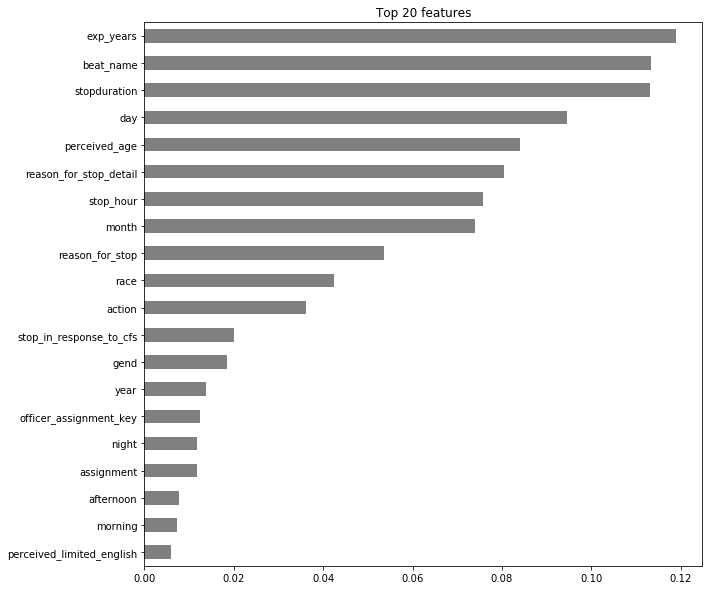

In [34]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n=20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [ ]:
# Going to get permutation importance


# eli5 doesn't work well with pipelines, so need to decosntruct a little bit for it to work
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

# Going to instantiate the permuter class to get the permutation importance
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=2, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

In [ ]:
print('Shape before removing features:', X_train.shape)

In [ ]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

print('Shape after removing features:', X_train.shape)

In [ ]:
X_val = X_val[features]

In [ ]:
from sklearn.impute import SimpleImputer
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

# ROC AUC

In [ ]:
%%time
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train);

In [ ]:
#  get accuracy score for model
y_pred = pipeline.predict(X_val)
accuracy_score(y_val, y_pred)

In [ ]:
# define confusion matrix function
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

In [ ]:
plot_confusion_matrix(y_val, y_pred);

In [ ]:
# get precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

In [ ]:
# get ROC AUC score for model
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:, 1]

In [ ]:
# Plot ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
tpr, fpr, thresholds = roc_curve(y_val=='Citation for infraction', y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

# Exploratory Visual analysis

In [ ]:
df.exp_years.value_counts(normalize=True)

In [ ]:
import seaborn as sns
sns.distplot(df.exp_years);

In [ ]:
df.action

In [ ]:
df_ticket = df[df['result'] == 'Citation for infraction']

In [ ]:
df_no_ticket = df[df['result'] != 'Citation for infraction']

In [ ]:
# Looks like three out of the five highest percentage time slots for getting a ticket are during the afternoon commute
# The third highest, though not in the afternoon, is during the morning commute. From 8-9AM
df_ticket['stop_hour'].value_counts(normalize=True).plot(kind='bar');
print(df_ticket['stop_hour'].value_counts(normalize=True))

In [ ]:
# it seems like the time of day when you're most likely to get off with just a warning or less would be at 10PM.
# Possible reasons could be that, it's too early for most people to be staggeringly drunk. That likelihood increases the later it gets
print(df_no_ticket['stop_hour'].value_counts(normalize=True))
df_no_ticket['stop_hour'].value_counts().plot(kind='bar');

In [ ]:
df_no_ticket['exp_years'].value_counts().plot(kind='bar');
print(df_no_ticket['exp_years'].value_counts(normalize=True))

In [ ]:
df_ticket['exp_years'].value_counts().plot(kind='bar');
print(df_ticket['exp_years'].value_counts(normalize=True))

In [ ]:
print(df.exp_years.value_counts())
print(df_no_ticket.exp_years.value_counts())
print(df_ticket.exp_years.value_counts())

In [ ]:
9289 / (9289 + 17929)

In [ ]:
df_ticket['day'].value_counts().plot(kind='bar');

In [ ]:
df_ticket['day'].value_counts(normalize=True)

In [ ]:
df_no_ticket['day'].value_counts().plot(kind='bar');

In [ ]:
df_no_ticket['day'].value_counts()

In [ ]:
df_ticket.reason_for_stop_detail.value_counts(normalize=True)

In [ ]:
df_no_ticket.reason_for_stop_detail.value_counts(normalize=True)